In [1]:
# Import libraries
from GRANTA_MIScriptingToolkit import granta as mpy
import GRANTA_MIScriptingToolkit as gdl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd
from wordcloud import WordCloud

In [2]:
mi = mpy.connect('http://azewacadmi1v1.win.ansys.com/mi_servicelayer/', autologon=True)
mi
mi.dbs

[<Database: ASM Medical Materials, unit system: Database>,
 <Database: Multiscale materials properties, unit system: Database>,
 <Database: AM_Material_Process_Data, unit system: Database>,
 <Database: Sustainability, unit system: Database>,
 <Database: JAHM Curve Data, unit system: Database>,
 <Database: Lvl 3 - Built Environment, unit system: Database>,
 <Database: Restricted Substances, unit system: Database>,
 <Database: MI Asphalt Database, unit system: Database>,
 <Database: Academic Resources Database, unit system: Database>,
 <Database: HighTemperatureSuperconductors_SynthesisCharacterization, unit system: Database>,
 <Database: Additive Manufacturing Template, unit system: Database>,
 <Database: MI Product Design Projects, unit system: Database>,
 <Database: MaterialUniverse, unit system: Database>,
 <Database: MI_HC_Team, unit system: Database>,
 <Database: Composites Template, unit system: Database>,
 <Database: Human Biological Materials, unit system: Database>,
 <Database:

In [3]:
my_db = mi.get_db('Academic Resources Database')
my_db.tables

[<Table name: Granta Reference Papers, subsets: set()>,
 <Table name: Ansys Reference Papers, subsets: set()>,
 <Table name: Other Literature, subsets: set()>,
 <Table name: All Resources, subsets: set()>,
 <Table name: Authors / Professors / Researchers / Employees, subsets: set()>,
 <Table name: Student Teams, subsets: set()>,
 <Table name: Universities / Institutions / Laboratories / Companies, subsets: set()>,
 <Table name: Countries, subsets: set()>,
 <Table name: Societies and Communities, subsets: set()>,
 <Table name: Events, Conferences, Workshops, Symposia, subsets: set()>,
 <Table name: Collaboration, Sponsoring, (C)R&D Projects..., subsets: set()>,
 <Table name: Products, Softwares, subsets: set()>]

In [4]:
my_db.tables[0].children

[<Record long name:Selector>,
 <Record long name:EduPack>,
 <Record long name:CES Software ?>,
 <Record long name:MI>,
 <Record long name:MDS>,
 <Record long name:_Reference Papers to Analyze_>]

In [5]:
session = gdl.GRANTA_MISession('http://azewacadmi1v1.win.ansys.com/mi_servicelayer/', autoLogon=True)
browseService = session.browseService
databases = browseService.GetDatabases().databases

print("Found {0} databases on the Granta MI Server".format(len(databases)))
for d in databases:
    print("Database key: {0.DBKey}, Database name: {0.name}".format(d))

Found 18 databases on the Granta MI Server
Database key: MI_ASM_Medical_Materials_1.54.3_2022_R1, Database name: ASM Medical Materials
Database key: MI_BiCrystalProject, Database name: Multiscale materials properties
Database key: AM_Material_Process_Data, Database name: AM_Material_Process_Data
Database key: MU_Sandbox_Energy_systems, Database name: Sustainability
Database key: MI_JAHM_1.3.3m_2021_R2, Database name: JAHM Curve Data
Database key: Lvl3_BuildingEnvironment, Database name: Lvl 3 - Built Environment
Database key: MI_Restricted_Substances, Database name: Restricted Substances
Database key: MI_Asphalt, Database name: MI Asphalt Database
Database key: MI_RefPapers, Database name: Academic Resources Database
Database key: HighTemperatureSuperconductors_SynthesisCharacterization, Database name: HighTemperatureSuperconductors_SynthesisCharacterization
Database key: MI_Template_Additive_Manufacturing, Database name: Additive Manufacturing Template
Database key: MI_ProductDesign, 

In [6]:
df = pd.DataFrame({'DBKey': [db.DBKey for db in databases],
                  'DBName': [db.name for db in databases]})
df

,DBKey,DBName
0,MI_ASM_Medical_Materials_1.54.3_2022_R1,ASM Medical Materials
1,MI_BiCrystalProject,Multiscale materials properties
2,AM_Material_Process_Data,AM_Material_Process_Data
3,MU_Sandbox_Energy_systems,Sustainability
4,MI_JAHM_1.3.3m_2021_R2,JAHM Curve Data
5,Lvl3_BuildingEnvironment,Lvl 3 - Built Environment
6,MI_Restricted_Substances,Restricted Substances
7,MI_Asphalt,MI Asphalt Database
8,MI_RefPapers,Academic Resources Database
9,HighTemperatureSuperconductors_SynthesisCharac...,HighTemperatureSuperconductors_SynthesisCharac...


In [7]:
# Get Tables from Ref Papers DB
dbKey = "MI_RefPapers"
tables = browseService.GetTables(gdl.GetTables(DBKey=dbKey)).tableDetails

print("Found {0} tables in database {1}".format(len(tables), dbKey))
for t in tables:
    print("Table name: {0}".format(t.tableReference.name))

Found 12 tables in database MI_RefPapers
Table name: Granta Reference Papers
Table name: Ansys Reference Papers
Table name: Other Literature
Table name: All Resources
Table name: Authors / Professors / Researchers / Employees
Table name: Student Teams
Table name: Universities / Institutions / Laboratories / Companies
Table name: Countries
Table name: Societies and Communities
Table name: Events, Conferences, Workshops, Symposia
Table name: Collaboration, Sponsoring, (C)R&D Projects...
Table name: Products, Softwares


In [8]:
# Get data from Granta ref papers table
table = 'Granta Reference Papers'
attribute = "Year of Publication"

tableRef = gdl.PartialTableReference(tableName=table)
attrRef = gdl.AttributeReference(name=attribute, DBKey=dbKey, partialTableReference=tableRef)
searchCriterion = gdl.RecordSearchCriterion(searchAttribute=attrRef, existsSearchValue=gdl.ExistsSearchValue())
request = gdl.CriteriaSearch(DBKey=dbKey, searchCriteria=[searchCriterion])

searchResults = session.searchService.CriteriaSearch(request).searchResults

df2 = pd.DataFrame({'ShortName': [r.shortName for r in searchResults],
                     'LongName': [r.longName  for r in searchResults]})
df2

,ShortName,LongName
0,1994_D. Cebon_Measu_Mater,1994_D. Cebon_Measurement Science _Materials s...
1,1999_P.M. Weaver_12th _Compu,1999_P.M. Weaver_12th International C_Computer...
2,2001_H.R. Shercliff_Progr_Selec,2001_H.R. Shercliff_Progress in Material_Selec...
3,2001_V.V. Tsukruk_Tribo_Nanoc,2001_V.V. Tsukruk_Tribology Letters_Nanocompos...
4,2003_J.S. Cooper_The I_Speci,2003_J.S. Cooper_The International Jo_Specifyi...
...,...,...
886,2022_Shoji_BendableConcrete,2022_Shoji_BendableConcrete
887,2022_Cornelio_SurgicalMasks,2022_Cornelio_SurgicalMasks
888,2022_Li_Cutter–Woodchip,2022_Li_Cutter–Woodchip
889,2015_Yin_MaterialsDatabase,2015_Yin_MaterialsDatabase


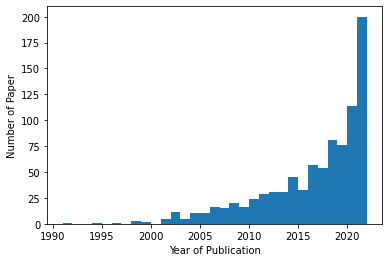

In [9]:
# Year analysis
attribute = "Year of Publication"
attributeLim = "Principal Granta Product used"

attributesInt = ["Year of Publication"]
attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributesInt]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

# Export data in a table
s_year = [None]*len(df2)
for attributeInt in attributesInt:
    for idx, record in enumerate(recordData):
        attrValueInt = next((x for x in record.attributeValues if x.attributeName == attributeInt), None)
        s_year[idx] = attrValueInt.integerDataValue.value.real if attrValueInt else None
    df2[attributeInt] = s_year
df2

#Plot
figure=plt.figure(1)
plt.hist(s_year, bins=max(s_year)-min(s_year))
plt.xlabel('Year of Publication')
plt.ylabel('Number of Paper')
plt.savefig("Paper_Year"+".png", bbox_inches='tight')

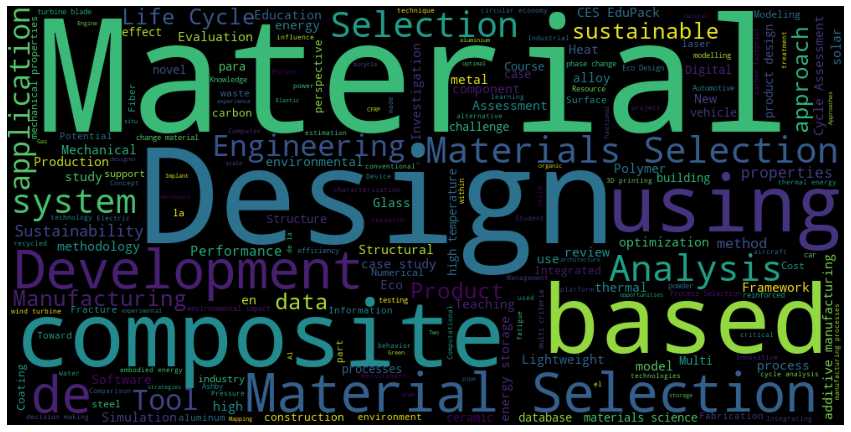

In [10]:
# Title analysis

# Get data from the DB
attributesTxt = ["Title"]
attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributesTxt]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

# Export data in a table
s_title = [None]*len(df2)
for attributeTxt in attributesTxt:
    for idx, record in enumerate(recordData):
        attrValueTxt = next((x for x in record.attributeValues if x.attributeName == attributeTxt), None)
        s_title[idx] = attrValueTxt.longTextDataType.value if attrValueTxt else None
    df2[attributeTxt] = s_title
df2

# Wordcloud plot
# https://amueller.github.io/word_cloud/index.html
unique_string=(" ").join(s_title)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("WordCloud_Title"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [11]:
# Affiliations analysis

#Get data from the DB
attributesTxt = ["Affiliation(s) (university, institution, company...)"]
attrRefs = [gdl.AttributeReference(name=a, DBKey=dbKey, partialTableReference=tableRef) for a in attributesTxt]
recordRefs = [r.recordReference for r in searchResults]
request = gdl.GetRecordAttributesByRefRequest(recordReferences=recordRefs, attributeReferences=attrRefs)
recordData = session.dataExportService.GetRecordAttributesByRef(request).recordData

# Export data in a table
s_aff = [None]*len(df2)
for attributeTxt in attributesTxt:
    for idx, record in enumerate(recordData):
        attrValueTxt = next((x for x in record.attributeValues if x.attributeName == attributeTxt), None)
        s_aff[idx] = attrValueTxt.longTextDataType.value if attrValueTxt else None
    df2[attributeTxt] = s_aff
df2

# Wordcloud plot
# https://amueller.github.io/word_cloud/index.html
unique_string2=(" ").join(s_aff)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("WordCloud_Affiliations"+".png", bbox_inches='tight')
plt.show()
plt.close()

TypeError: sequence item 13: expected str instance, NoneType found

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()